## Explore Linear Correlation Between Every Feature and "Suicide-Risk" (Predictive Variable) (Vicky)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

norm_data = pd.read_csv('data/new_health.csv')
norm_data['suicide_risk'].value_counts()

0.000000    178945
0.166667      6795
0.500000      1896
1.000000      1279
0.666667       374
0.333333         6
Name: suicide_risk, dtype: int64

### Overall Correlation

In [2]:
correlation_df = norm_data.corr().sort_values('suicide_risk', ascending = False) # using new_health.csv
# a dictionary whose values are the correlation score between each feature and suicide_risk, sorted in order
corr_in_order = {}
for col in correlation_df:
    if col != 'suicide_risk' and col != 'Unnamed: 0':
        corr_in_order[col] = correlation_df['suicide_risk'].loc[col].round(3)
#corr_in_order = sorted(corr_in_order.items(), key=lambda item: abs(item[1]), reverse = True)
corr_in_order

{'RELIG_SERVICES_12month': -0.039,
 'RELIG_IMPORTANT': 0.052,
 'RELIG_influ_decision': 0.052,
 'friend_SHARE_REL': 0.04,
 'Tabacco_Flag': 0.017,
 'Alcohol_Flag': 0.009,
 'Marijunana_Flag': 0.029,
 'Marijuana_Only_Flag': -0.003,
 'Cocaine_Flag': 0.028,
 'Crack_Flag': 0.029,
 'Herion_Flag': 0.026,
 'Hallcinogens_Flag': 0.029,
 'Inhalants_Flag': 0.027,
 'Painkiller_Flag': 0.038,
 'Tranquilizer_Flag': 0.037,
 'Stimulant Flag': 0.021,
 'Meth_Flag': 0.019,
 'Sedatives Flag': 0.02,
 'Any_Drug_Flag': 0.034,
 'Drug_Not_Marijunana': 0.039,
 'Ever_Steal_50': 0.091,
 'Sell_Illegal_Drugs': 0.076,
 'Ever_Booked_Arrested': 0.046,
 'Drug_or_Alc_Past_year': 0.032,
 'inpatient': -0.229,
 'outpatient': -0.179,
 'needed_not_rcvd': -0.243,
 'rcvd_any_tmt': -0.178,
 'psych_distress_month': 0.299,
 'psych_distress_yr': 0.301,
 'whodas_score': 0.262,
 'predicted_ment_ill': 0.459,
 'svrl_days_depressed': -0.162,
 'lifetime_mde': -0.245,
 'pst_yr_mde': -0.292,
 'age': -0.065,
 'HEALTH': 0.072,
 'IRSEX': 0.016,


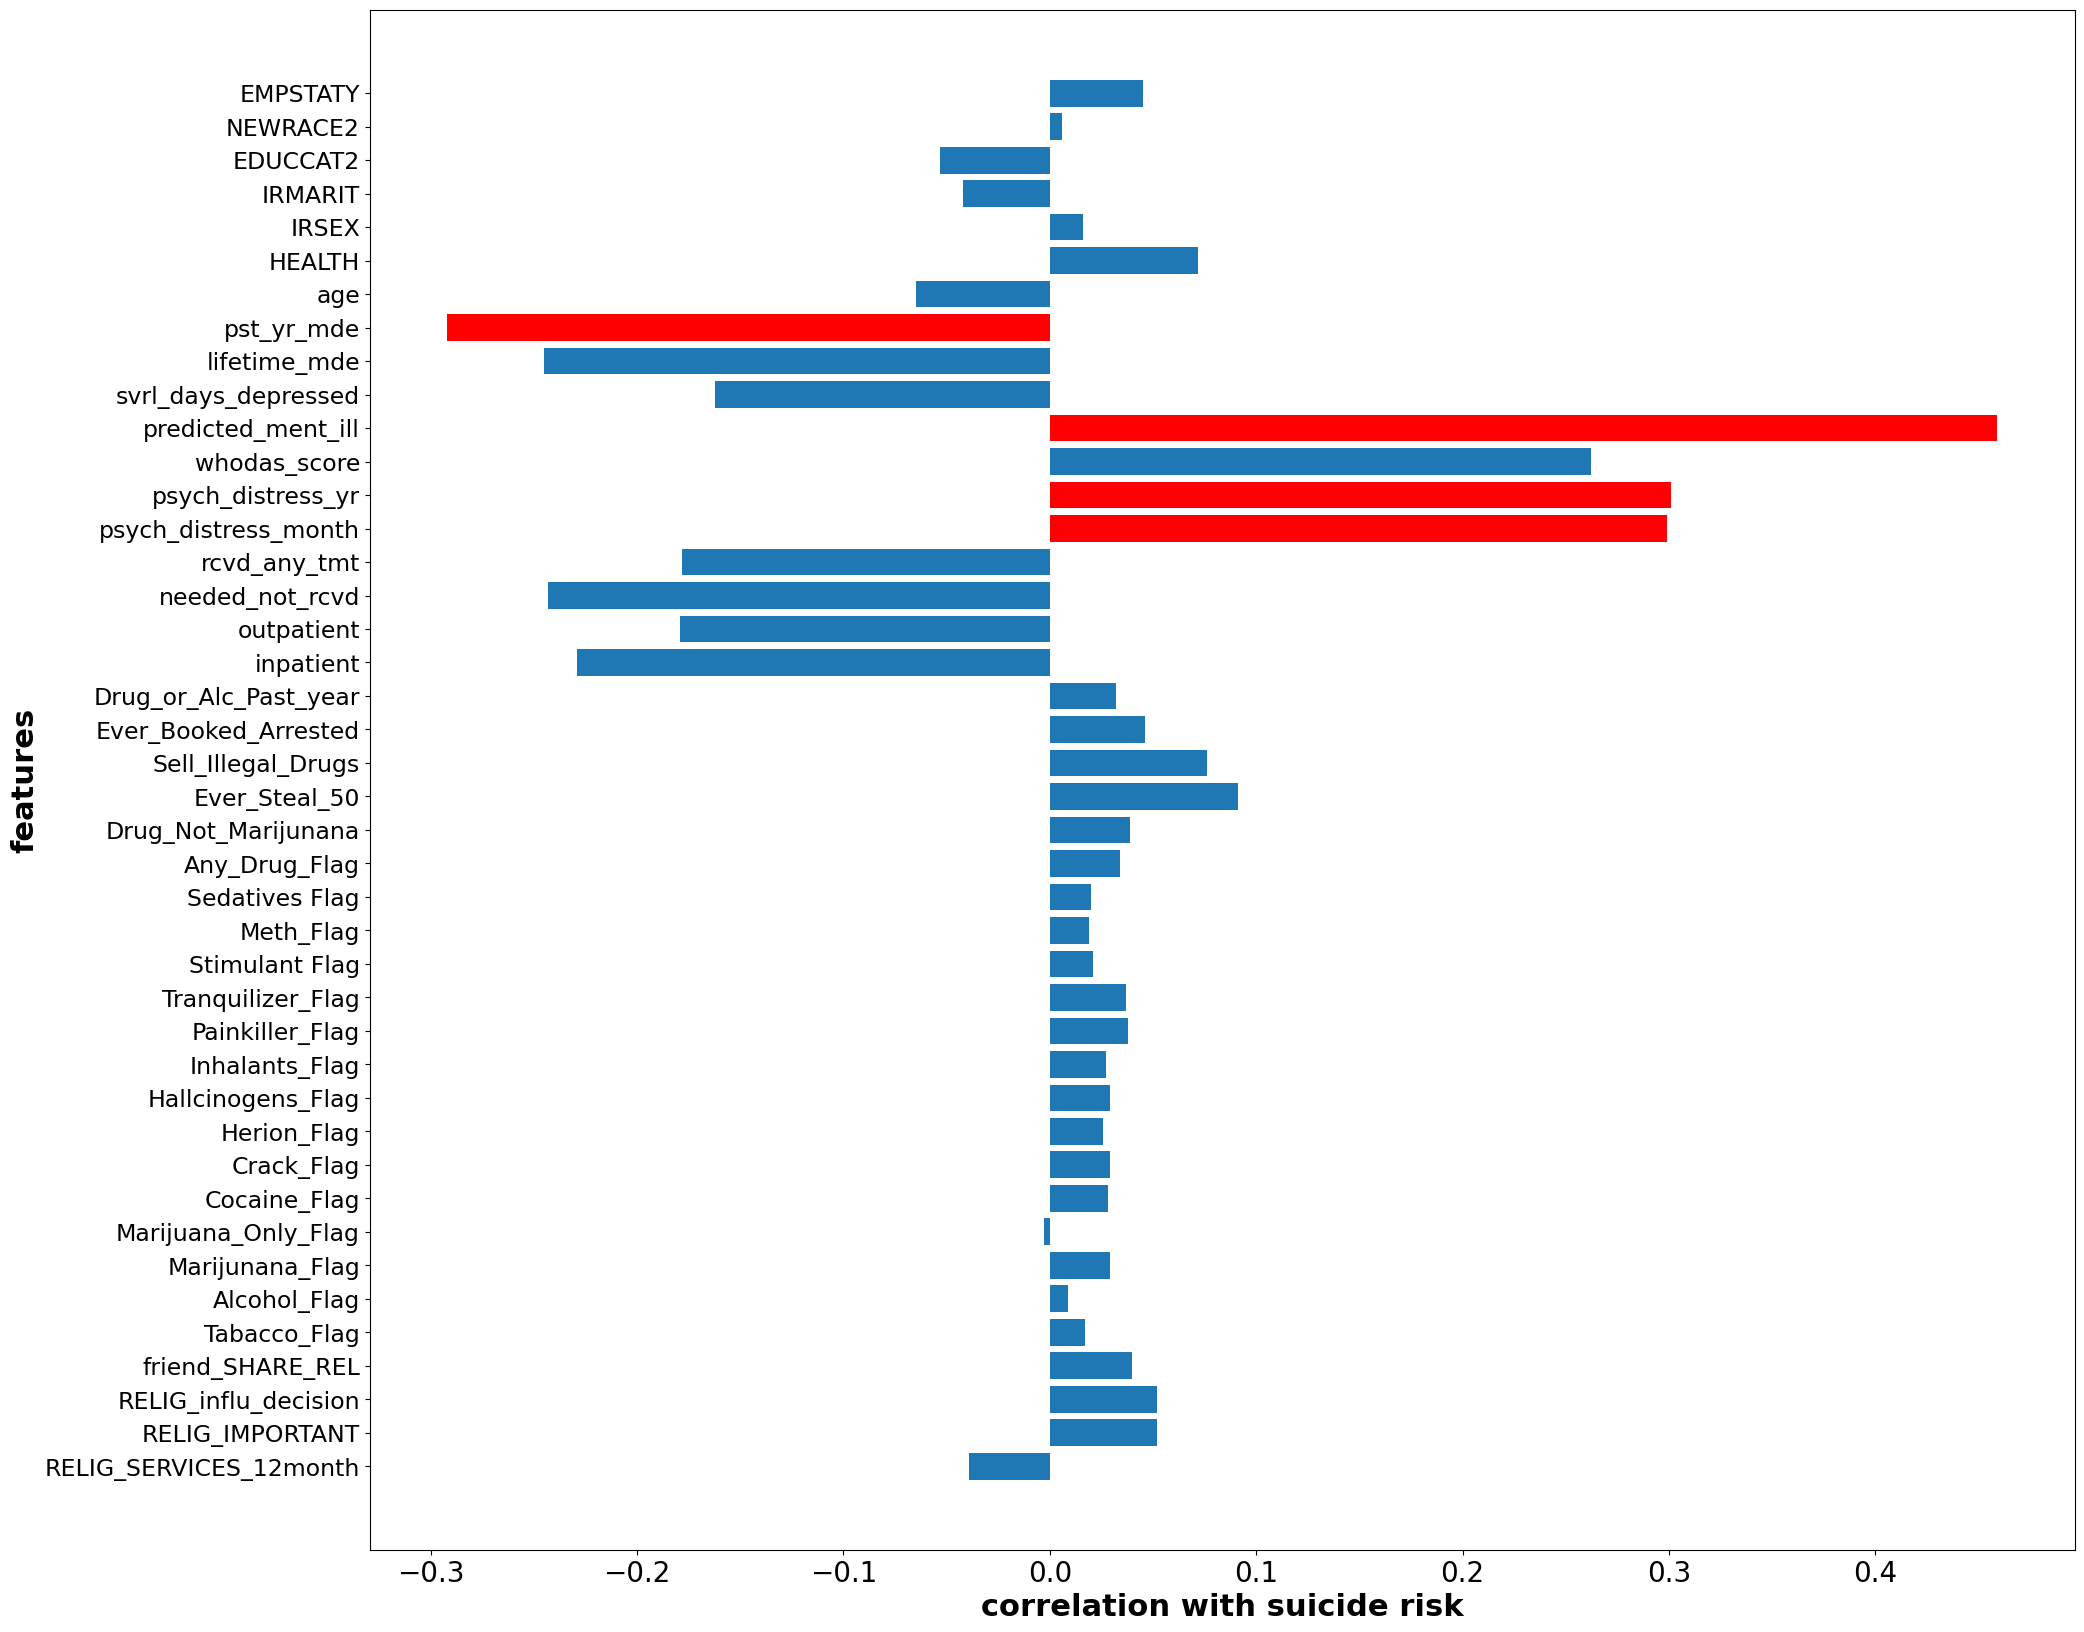

In [3]:
#horizonal
from pylab import *

y = list(corr_in_order.keys())
x = list(corr_in_order.values())
plt.subplots(figsize=(22,20))
plt.barh(y, x, color = ["red" if abs(i) > 0.28 else "#1f77b4" for i in x])
plt.ylabel('features', weight = 'bold', fontsize=22)
plt.xlabel('correlation with suicide risk', weight = 'bold', fontsize=22)

ax = gca()

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=17)


<AxesSubplot:>

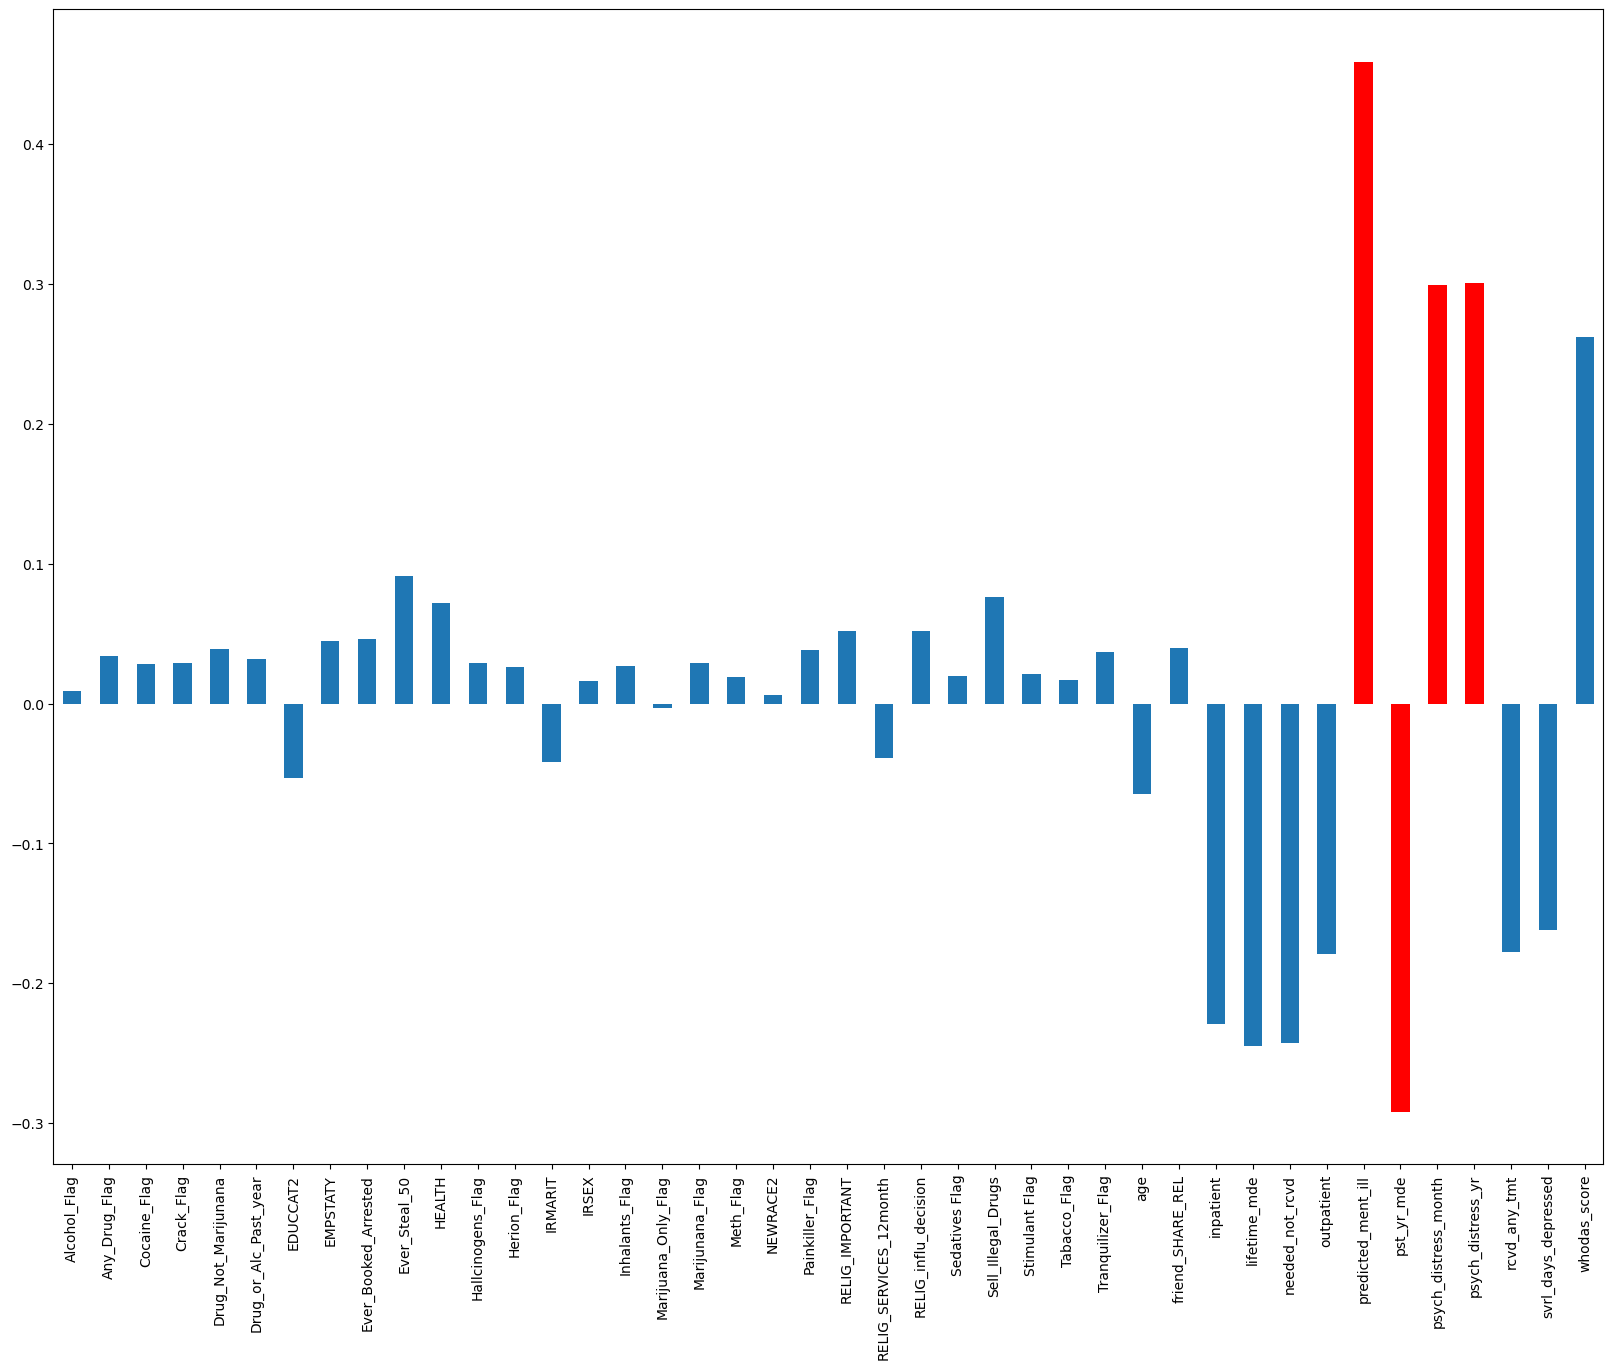

In [4]:
#vertical
corr = pd.Series(corr_in_order).sort_index()

plt.subplots(figsize=(20,15))
vals = corr.values
corr.plot(kind='bar', color = ["red" if abs(i) > 0.28 else "#1f77b4" for i in vals])


/Users/xiangzairan/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


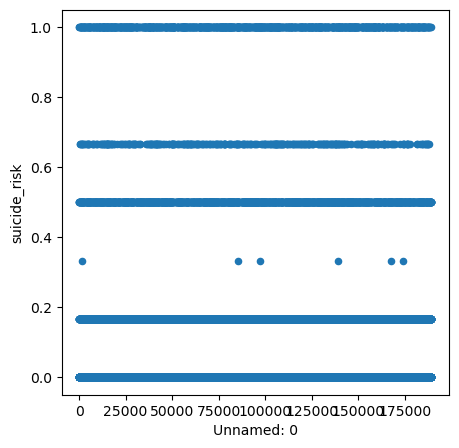

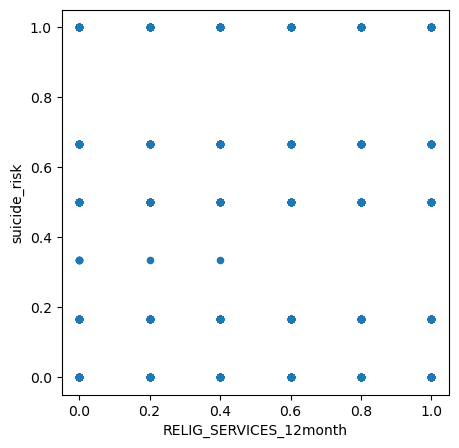

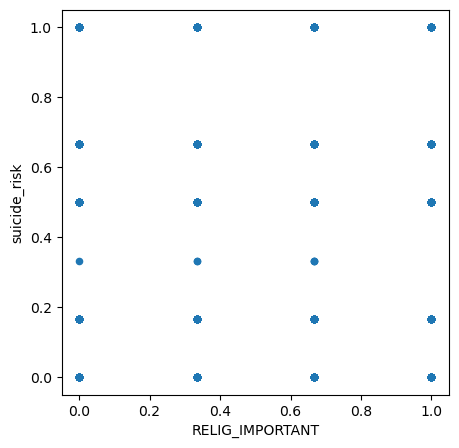

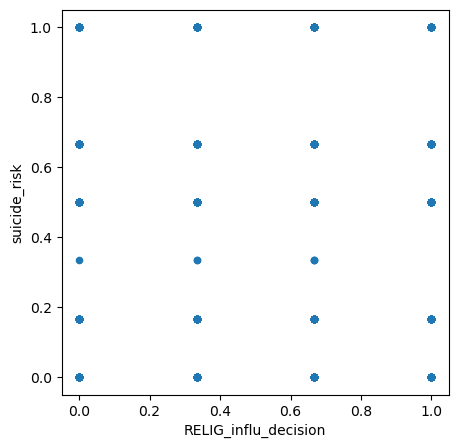

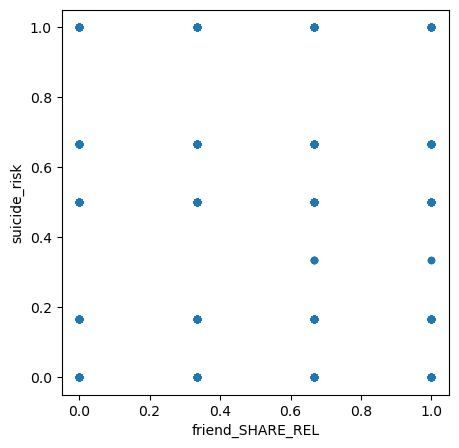

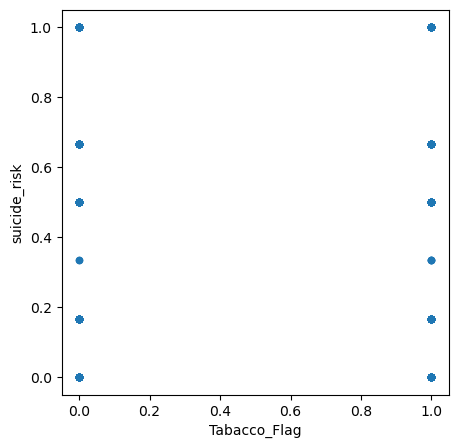

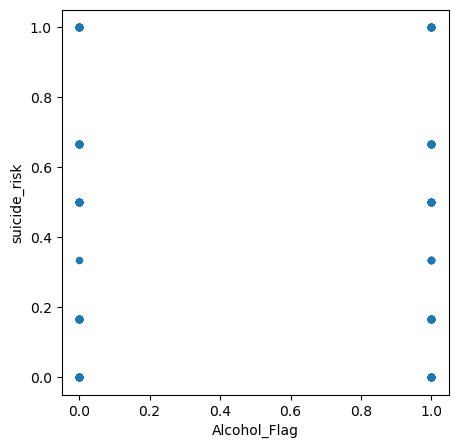

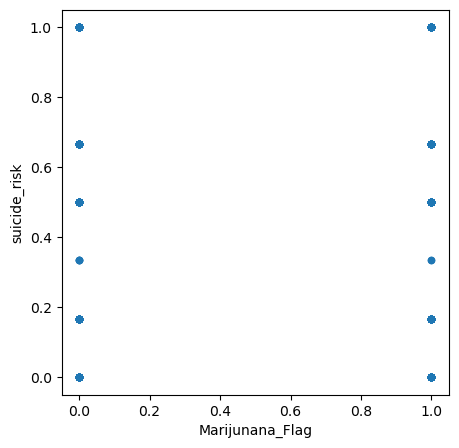

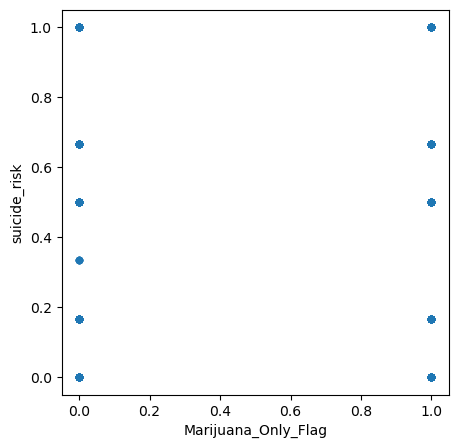

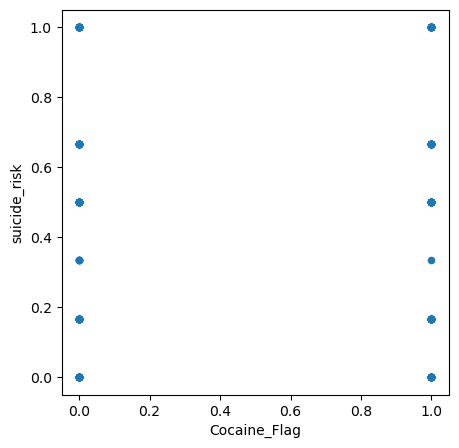

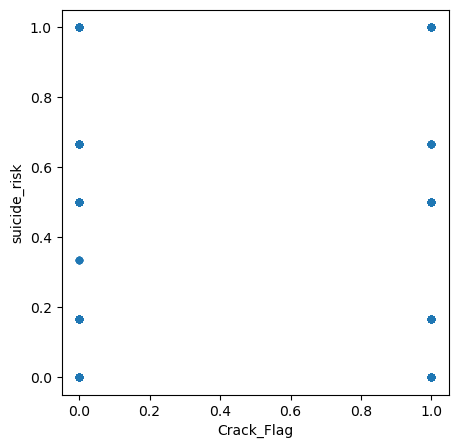

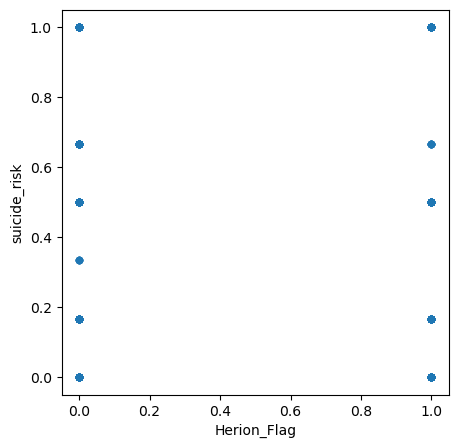

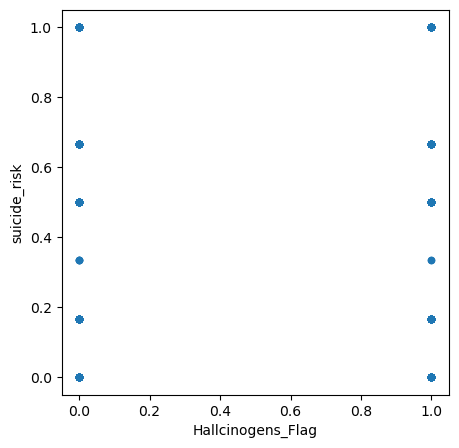

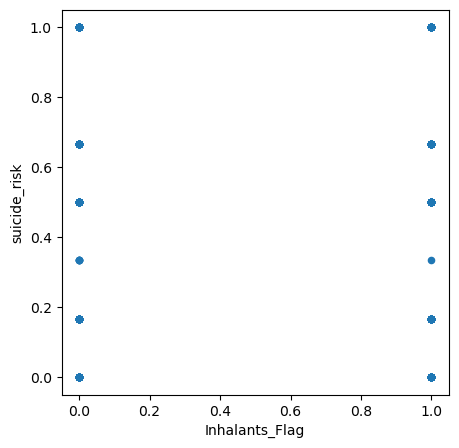

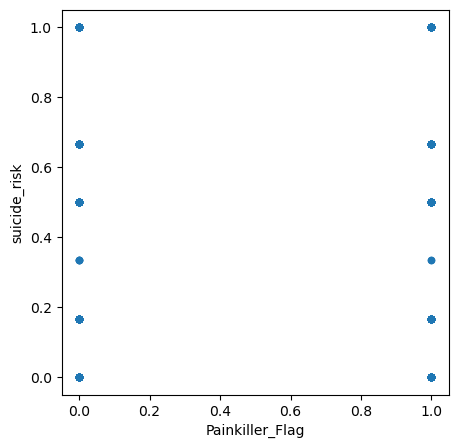

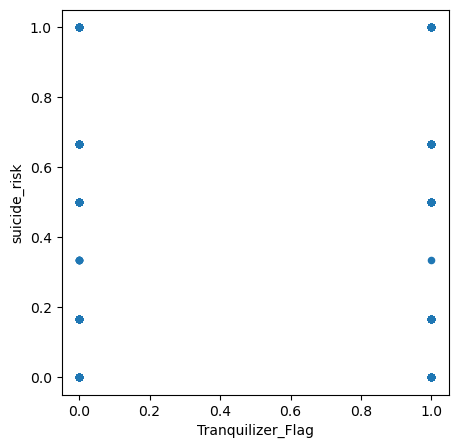

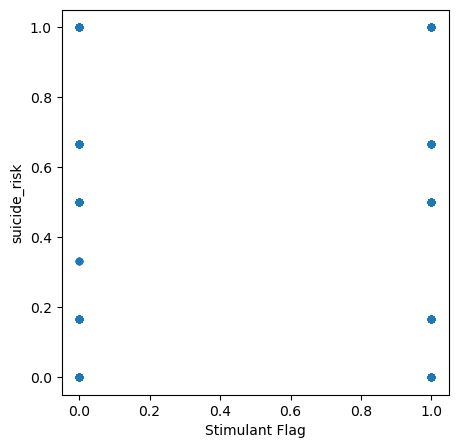

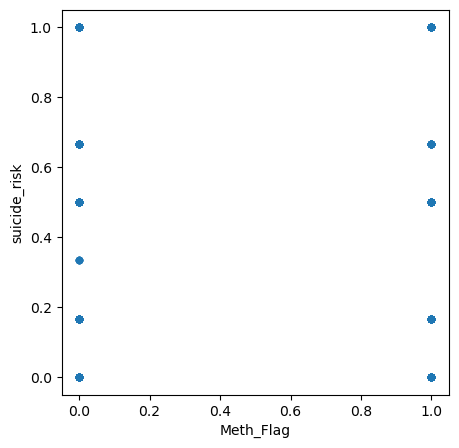

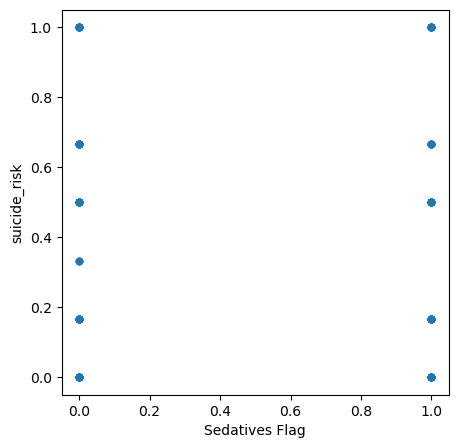

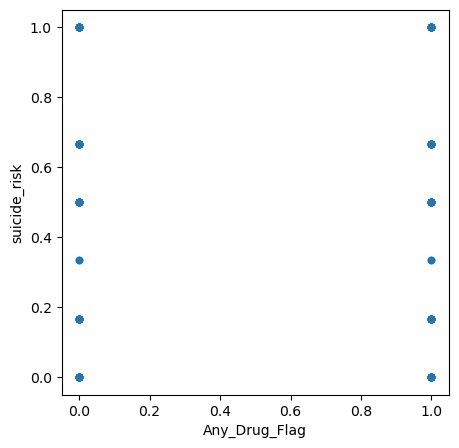

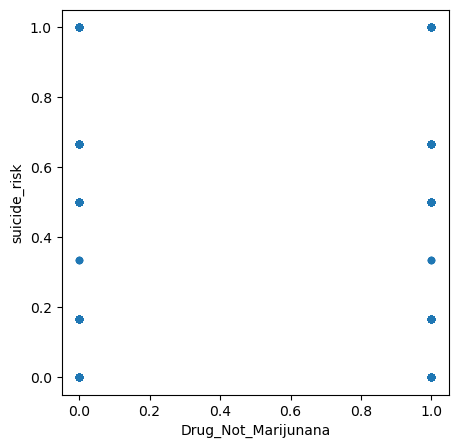

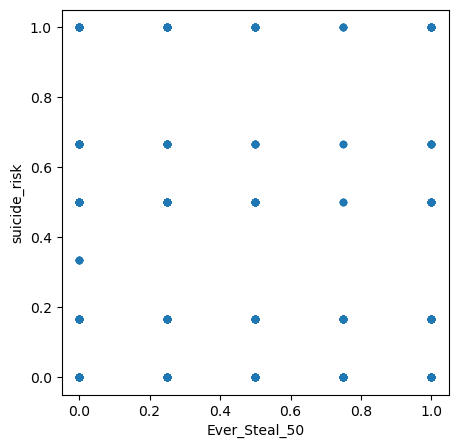

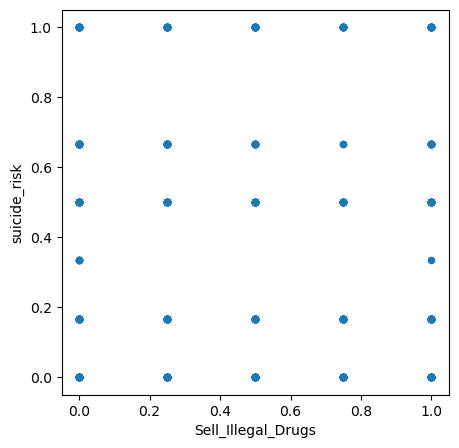

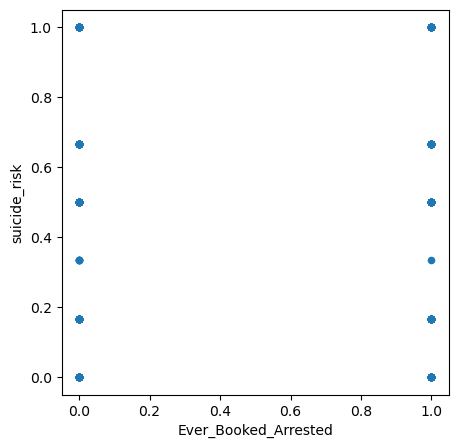

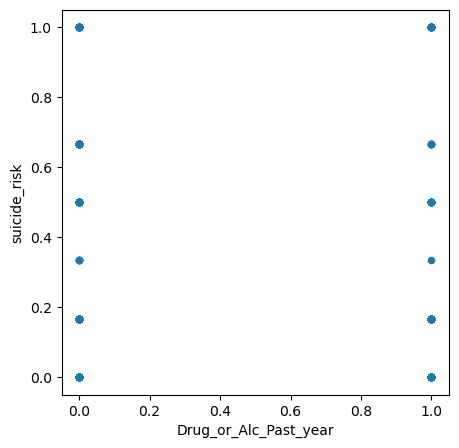

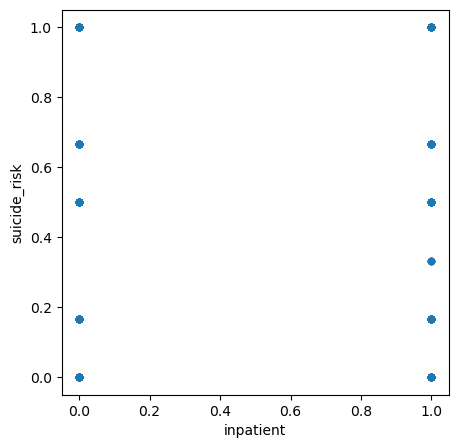

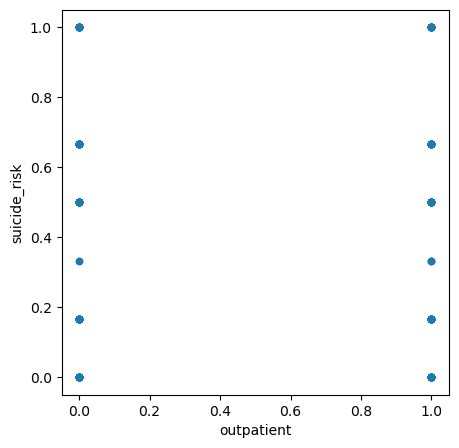

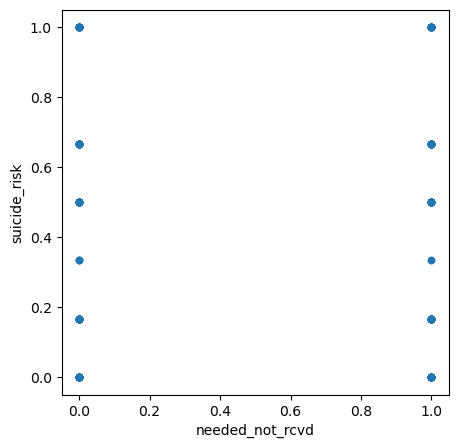

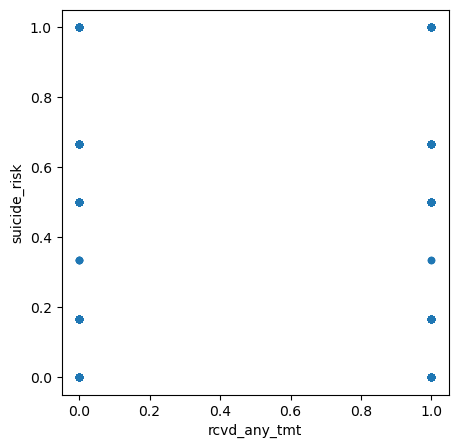

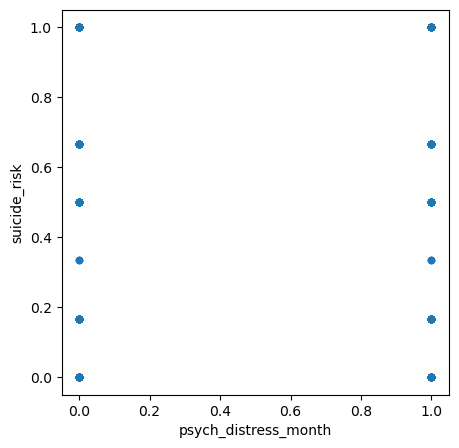

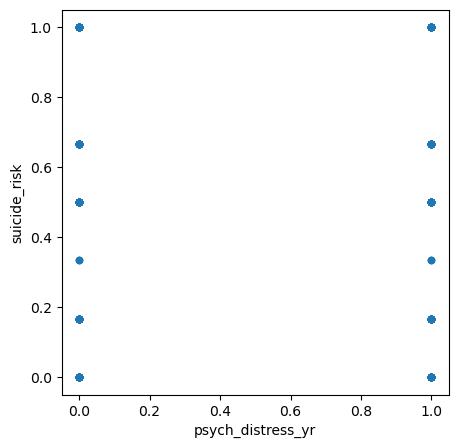

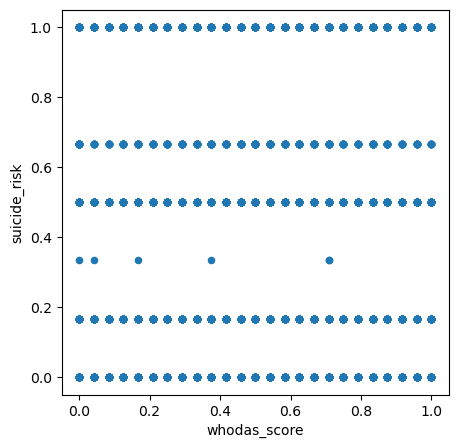

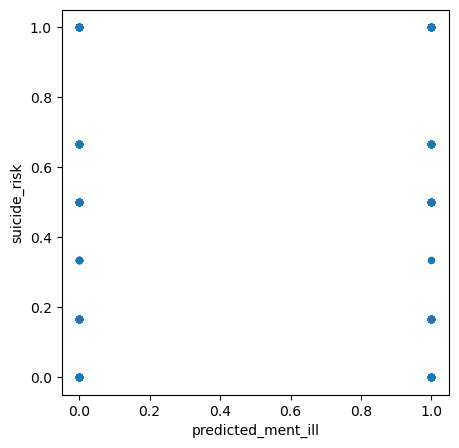

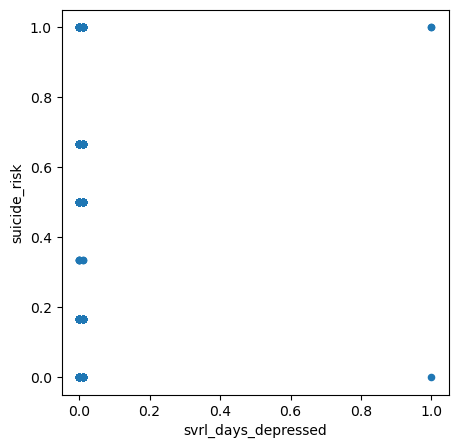

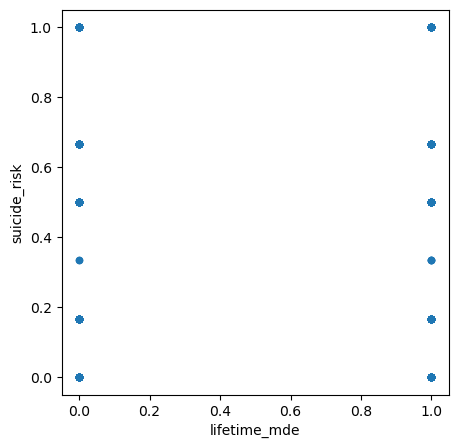

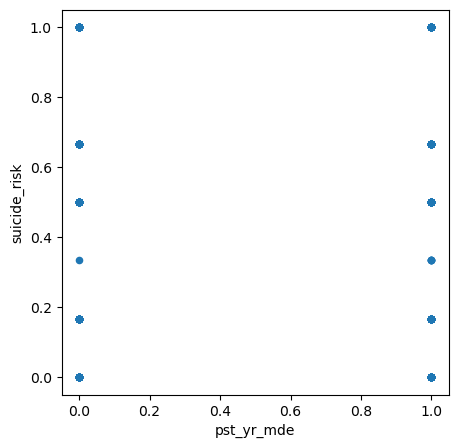

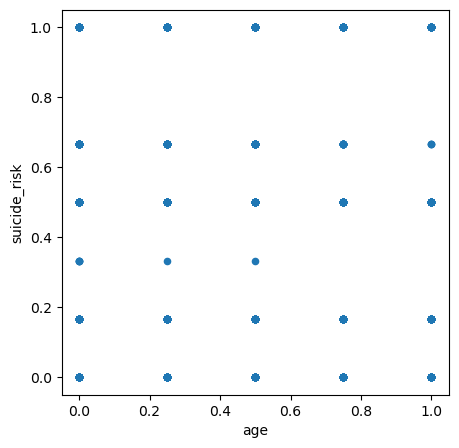

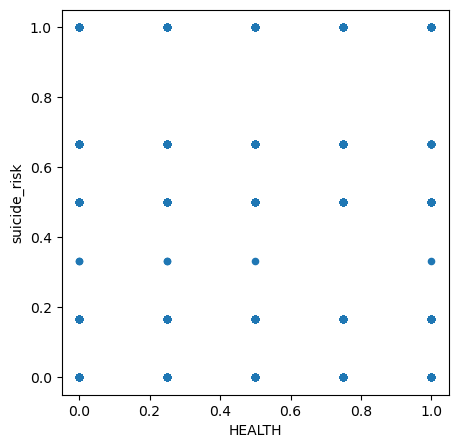

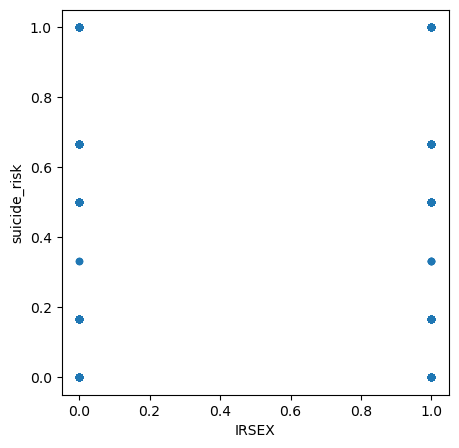

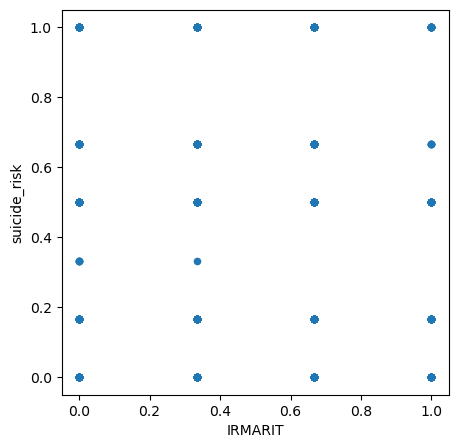

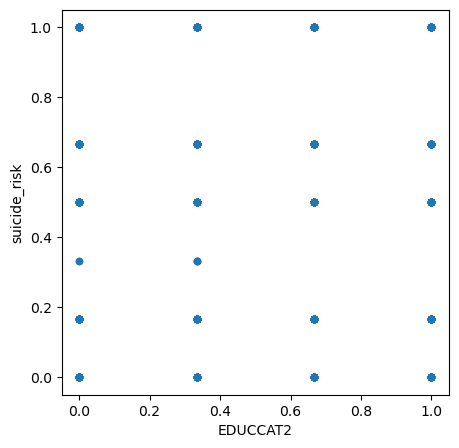

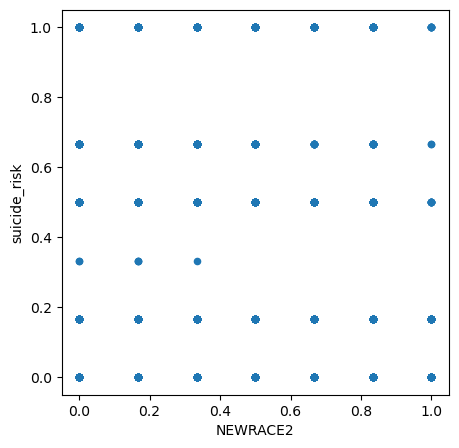

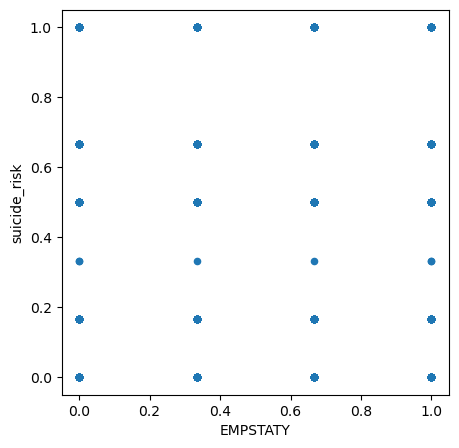

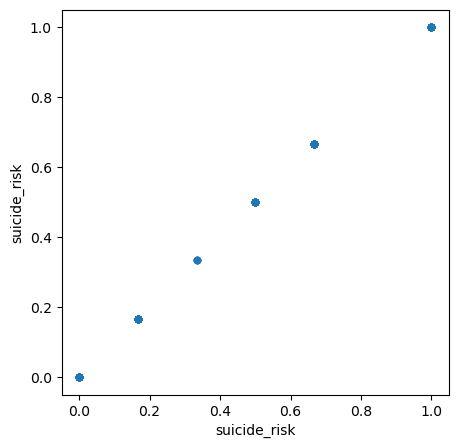

In [5]:
#scatter plot
for col in norm_data:
    norm_data.plot(kind = 'scatter', x = col, y = 'suicide_risk', figsize = (5, 5))

array([[<AxesSubplot:title={'center':'EDUCCAT2'}>,
        <AxesSubplot:title={'center':'NEWRACE2'}>],
       [<AxesSubplot:title={'center':'EMPSTATY'}>,
        <AxesSubplot:title={'center':'suicide_risk'}>]], dtype=object)

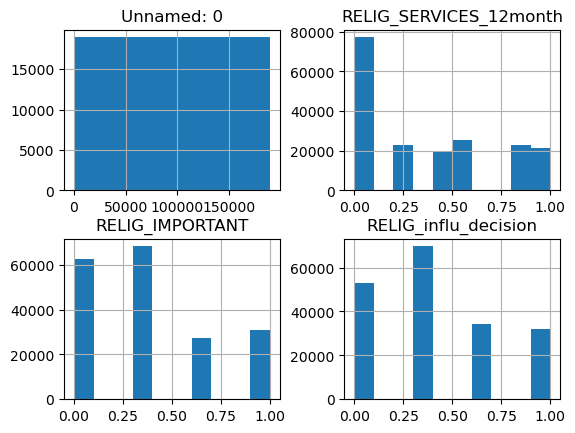

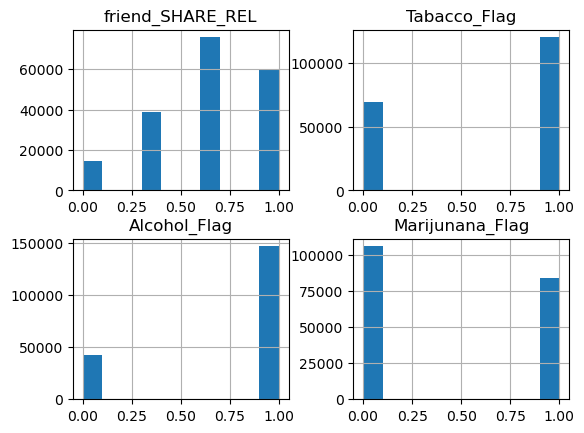

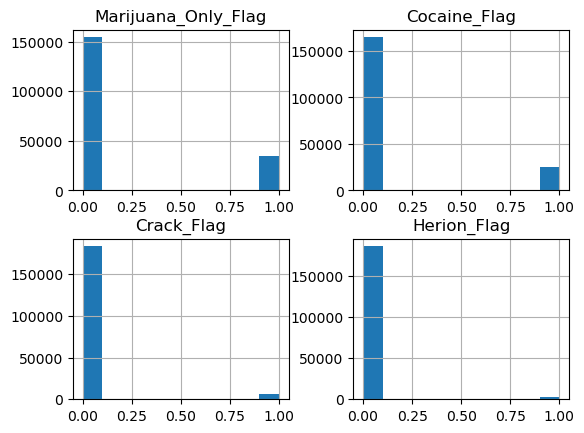

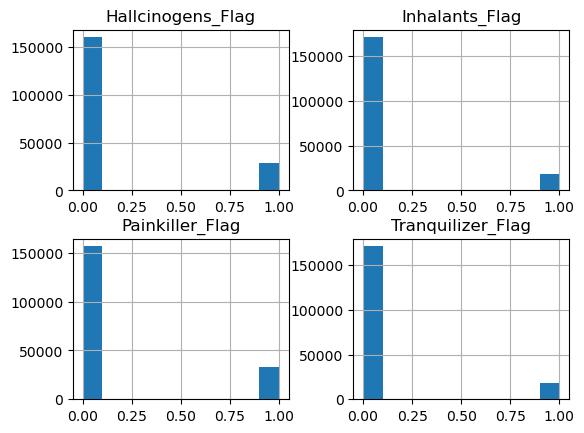

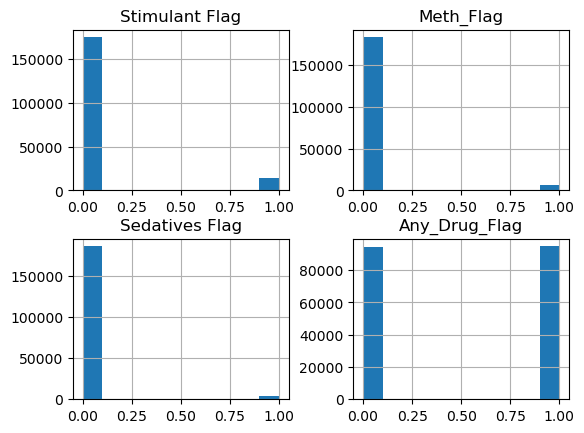

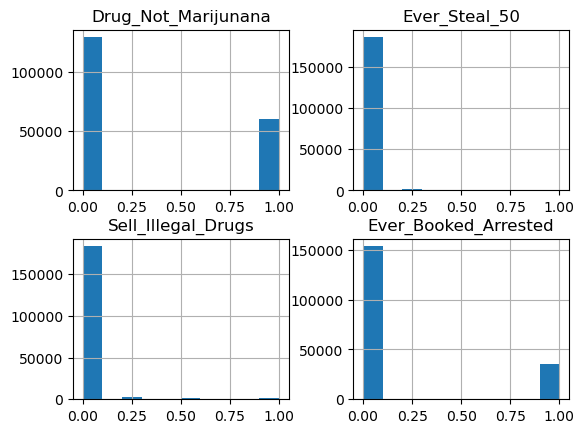

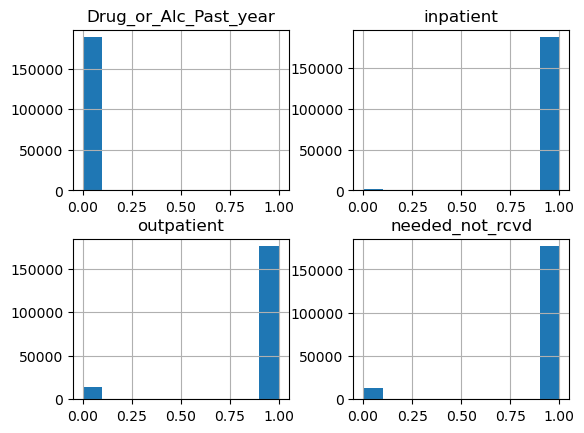

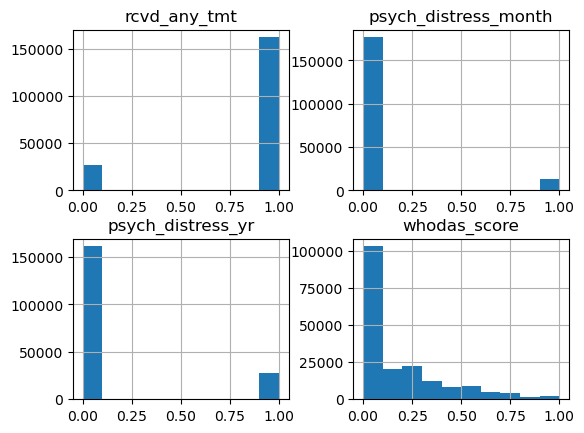

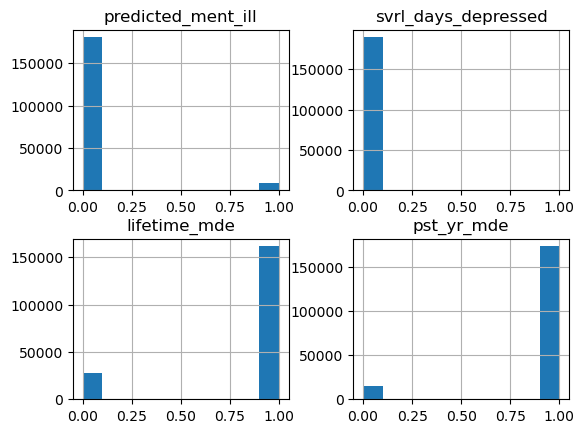

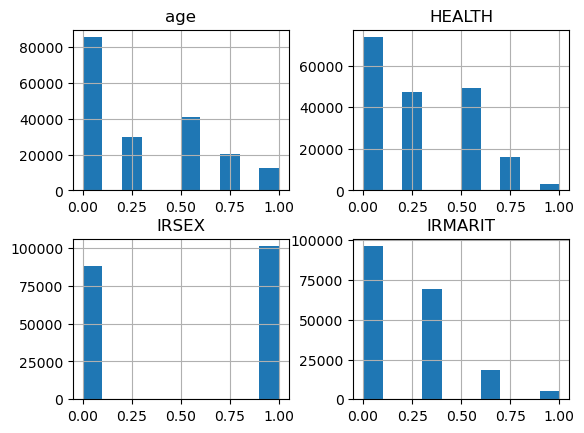

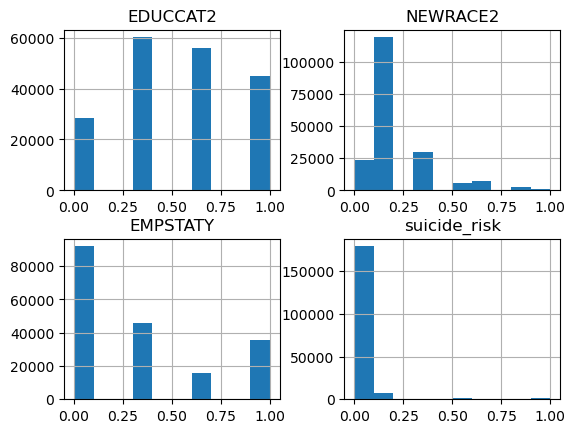

In [6]:
#histogram plot
lower = 0
upper = 4
while upper < len(norm_data.columns):
    norm_data[norm_data.columns[lower:upper]].hist()
    lower = upper
    upper = lower + 4
upper = len(norm_data.columns)
norm_data[norm_data.columns[lower:upper]].hist()

In [7]:
norm_data.columns

Index(['Unnamed: 0', 'RELIG_SERVICES_12month', 'RELIG_IMPORTANT',
       'RELIG_influ_decision', 'friend_SHARE_REL', 'Tabacco_Flag',
       'Alcohol_Flag', 'Marijunana_Flag', 'Marijuana_Only_Flag',
       'Cocaine_Flag', 'Crack_Flag', 'Herion_Flag', 'Hallcinogens_Flag',
       'Inhalants_Flag', 'Painkiller_Flag', 'Tranquilizer_Flag',
       'Stimulant Flag', 'Meth_Flag', 'Sedatives Flag', 'Any_Drug_Flag',
       'Drug_Not_Marijunana', 'Ever_Steal_50', 'Sell_Illegal_Drugs',
       'Ever_Booked_Arrested', 'Drug_or_Alc_Past_year', 'inpatient',
       'outpatient', 'needed_not_rcvd', 'rcvd_any_tmt', 'psych_distress_month',
       'psych_distress_yr', 'whodas_score', 'predicted_ment_ill',
       'svrl_days_depressed', 'lifetime_mde', 'pst_yr_mde', 'age', 'HEALTH',
       'IRSEX', 'IRMARIT', 'EDUCCAT2', 'NEWRACE2', 'EMPSTATY', 'suicide_risk'],
      dtype='object')

### Specific Exploration (only those whose correlation score ~ 25%)
Explore in the order of decreasing correlation, starting from *predicted_ment_ill*

In [9]:
corr_in_order = sorted(corr_in_order.items(), key=lambda item: abs(item[1]), reverse = True)

corr_in_order[:15] #in decreasing correlation

[('predicted_ment_ill', 0.459),
 ('psych_distress_yr', 0.301),
 ('psych_distress_month', 0.299),
 ('pst_yr_mde', -0.292),
 ('whodas_score', 0.262),
 ('lifetime_mde', -0.245),
 ('needed_not_rcvd', -0.243),
 ('inpatient', -0.229),
 ('outpatient', -0.179),
 ('rcvd_any_tmt', -0.178),
 ('svrl_days_depressed', -0.162),
 ('Ever_Steal_50', 0.091),
 ('Sell_Illegal_Drugs', 0.076),
 ('HEALTH', 0.072),
 ('age', -0.065)]

#### predicted_ment_ill & suicide_risk
1. 8861 individuals are predicted to have mental illness. 732 (i.e., around 10%) has 1.0 risk of committing suicide. 2 2. Overall, except for the group where suicide_risk == 0, # of individuals who experience distress >= # of individuals who don't, in the rest of the groups that are all associated to some level of suicide_risk.
3. ~62% of individuals predicted to have mental illness also have a risk > 0, with ~25% having a risk >= 0.5.
4. individuals who are NOT predicted to have mental illness are also more associated with a higher risk compared to a similar feature: psych_distress_yr (see below) 

In [10]:
#count() returns the same series regardless of columns. I use age in this case
ment_risk = norm_data.groupby(['suicide_risk','predicted_ment_ill']).count()[['age']] 
ment_risk

age
suicide_risk predicted_ment_ill        
0.000000     0.0                 175725
             1.0                   3220
0.166667     0.0                   3362
             1.0                   3433
0.333333     0.0                      5
             1.0                      1
0.500000     0.0                    619
             1.0                   1277
0.666667     0.0                    176
             1.0                    198
1.000000     0.0                    547
             1.0                    732

In [11]:
norm_data[norm_data['predicted_ment_ill'] == 1.0].shape[0]

8861

#### psych_distress_yr & suicide_risk
27833 individuals experience "SERIOUS PSYCHOLOGICAL DISTRESS" in the past few years. More then 2500 of them (i.e., around 10%) has a 1.0 risk of committing suicide. 
1. Overall, except for the group where suicide_risk == 0, # of individuals who experience distress >= # of individuals who don't in the rest of the groups that are all associated to some level of suicide_risk. 
2. ~25% of individuals experiencing "SERIOUS PSYCHOLOGICAL DISTRESS" have a risk > 0, while only ~1% of those who don't experience distress are indicated to have a risk > 0
3. ~10% of individuals experiencing "SERIOUS PSYCHOLOGICAL DISTRESS" have a risk >= 0.5, which is < than the statistic of predicted_ment_ill

In [12]:
psyc_risk = norm_data.groupby(['suicide_risk','psych_distress_yr']).count()[['age']]
psyc_risk

age
suicide_risk psych_distress_yr        
0.000000     0.0                158156
             1.0                 20789
0.166667     0.0                  2491
             1.0                  4304
0.333333     0.0                     3
             1.0                     3
0.500000     0.0                   412
             1.0                  1484
0.666667     0.0                   109
             1.0                   265
1.000000     0.0                   291
             1.0                   988

In [13]:
norm_data[norm_data['psych_distress_yr'] == 1].shape[0]

27833

#### pst_yr_mde (experienced major depressive episode past year) & suicide_risk;  lifetime_mde & suicide_risk
1. 15331 individuals experienced mde past year, 32% have a risk > 0. Specifically, 13% have a risk >= 0.5. More percentage of those individuals are distributed in the risk > 0 area here than in psych_distress_yr, but there are less individuals in absolute terms, which may contribute to the slight difference between their correlation score to suicide_risk (~|0.01|)

2. number of individuals experiencing lifetime_mde > number of individuals experiencing pst_yr_mde (12000 more), but the large majority still does not experience mde of any kind (~90% of the sample size)

3. 27692 individuals experienced mde in their lifetime. 22% of them has a risk > 0, 5% have a risk >= 0.5. Therefore, lifetime_mde seems to contribute less to suicide_risk than pst_yr_mde in this sample.

In [15]:
mde_yr_risk = norm_data.groupby(['suicide_risk','pst_yr_mde']).count()[['age']]
#note: #0 in pst_yr_mde means yes; 1 means no
mde_yr_risk

age
suicide_risk pst_yr_mde        
0.000000     0.0          10366
             1.0         168579
0.166667     0.0           2960
             1.0           3835
0.333333     0.0              1
             1.0              5
0.500000     0.0           1164
             1.0            732
0.666667     0.0            168
             1.0            206
1.000000     0.0            672
             1.0            607

In [16]:
norm_data[norm_data['pst_yr_mde'] == 0.0].shape[0]

15331

In [17]:
norm_data['pst_yr_mde'].describe()

count    189295.00000
mean          0.91901
std           0.27282
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: pst_yr_mde, dtype: float64

In [18]:
mde_life_risk = norm_data.groupby(['suicide_risk','lifetime_mde']).count()[['age']] 
##0 in pst_yr_mde means yes; 1 means no
mde_life_risk

age
suicide_risk lifetime_mde        
0.000000     0.0            21564
             1.0           157381
0.166667     0.0             3784
             1.0             3011
0.333333     0.0                2
             1.0                4
0.500000     0.0             1355
             1.0              541
0.666667     0.0              209
             1.0              165
1.000000     0.0              778
             1.0              501

In [19]:
norm_data[norm_data['lifetime_mde'] == 0.0].shape[0]

27692

In [20]:
norm_data['lifetime_mde'].describe()
# mean is lower: more individuals experience mde in lifetime than in past year

count    189295.000000
mean          0.853710
std           0.353398
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: lifetime_mde, dtype: float64

#### whodas_score & suicide_risk: (whodas_score indicates the level of difficulty in performing daily activities due to problems with emotions, nerves, or mental health; is continuous).

1) the mean of whodas_score is a lot above 0 after normalization
2) except for the group where suicide_risk == 0, the whodas_scores are relatively large for the rest of the risk groups

In [22]:
norm_data['whodas_score'].describe()

count    189295.000000
mean          0.173461
std           0.224779
min           0.000000
25%           0.000000
50%           0.083333
75%           0.291667
max           1.000000
Name: whodas_score, dtype: float64

In [23]:
whodas_risk = norm_data.groupby(['suicide_risk'])['whodas_score'].median()
whodas_risk
#note: only 6 observations for the group where suicide_risk == 0.33

suicide_risk
0.000000    0.083333
0.166667    0.458333
0.333333    0.270833
0.500000    0.583333
0.666667    0.500000
1.000000    0.500000
Name: whodas_score, dtype: float64

#### needed_not_rcvd & suicide_risk
needed_not_rcvd: feeling a perceived need for mental health treatment/counseling that was not received

1. 12542 individuals didn't receive treatment they feel needed, 6% of the sample. (what is the % of people feeling a need for treatment though?)
2. ~ 30% has a risk > 0. ~12% has a risk >= 0.5. 
3. <b>observe: for almost all groups of risks, # individuals whose "needed_not_rcvd" == 0 > # individuals whose "needed_not_rcvd" == 1.</b> It can be partly explained by the fact that the majority is contributed by those whose "needed_not_rcvd" == 0, but it also applies for other features like the ones above, which doesn't have this phenomenon. 

In [24]:
need_risk = norm_data.groupby(['suicide_risk','needed_not_rcvd']).count()[['age']] 
#0 means yes, 1 means no here
need_risk

age
suicide_risk needed_not_rcvd        
0.000000     0.0                8708
             1.0              170237
0.166667     0.0                2316
             1.0                4479
0.333333     0.0                   4
             1.0                   2
0.500000     0.0                 857
             1.0                1039
0.666667     0.0                 133
             1.0                 241
1.000000     0.0                 524
             1.0                 755

In [25]:
norm_data[norm_data['needed_not_rcvd'] == 0.0].shape[0]

12542